<a href="https://colab.research.google.com/github/maggiecope/comp351-ai-project/blob/main/Comp351FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Import libraries and load the data!

import pandas as pd
import numpy as np

# Load the dataset
file_path = "Wait_Times.csv"
df = pd.read_csv(file_path)

# Inspect basic structure
print("Shape:", df.shape)
print("\nColumn types:")
print(df.dtypes)

# Preview first 5 rows
df.head()

Shape: (339064, 26)

Column types:
Land                 object
Ride                 object
Wait Time             int64
Local Time           object
Day of Week          object
Date                 object
tempmax             float64
tempmin             float64
temp                float64
humidity            float64
precip              float64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk            int64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
dtype: object


,Land,Ride,Wait Time,Local Time,Day of Week,Date,tempmax,tempmin,temp,humidity,...,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description
0,Pixar Pier,Toy Story Midway Mania!,40,2024-09-23 17:30:04,Monday,2024-09-23,78.4,62.4,67.9,80.5,...,5.6,210.0,18.0,8,10,2024-09-23 6:40:56,2024-09-23 18:46:15,0.69,Partially cloudy,Clearing in the afternoon.
1,Cars Land,Mater's Graveyard JamBOOree,30,2024-09-23 17:45:03,Monday,2024-09-23,78.4,62.4,67.9,80.5,...,5.6,210.0,18.0,8,10,2024-09-23 6:40:56,2024-09-23 18:46:15,0.69,Partially cloudy,Clearing in the afternoon.
2,Hollywood Land,Mickey's PhilharMagic,10,2024-09-23 17:45:03,Monday,2024-09-23,78.4,62.4,67.9,80.5,...,5.6,210.0,18.0,8,10,2024-09-23 6:40:56,2024-09-23 18:46:15,0.69,Partially cloudy,Clearing in the afternoon.
3,Pixar Pier,Jumpin' Jellyfish,20,2024-09-23 17:45:03,Monday,2024-09-23,78.4,62.4,67.9,80.5,...,5.6,210.0,18.0,8,10,2024-09-23 6:40:56,2024-09-23 18:46:15,0.69,Partially cloudy,Clearing in the afternoon.
4,Avengers Campus,WEB SLINGERS: A Spider-Man Adventure,45,2024-09-23 18:00:04,Monday,2024-09-23,78.4,62.4,67.9,80.5,...,5.6,210.0,18.0,8,10,2024-09-23 6:40:56,2024-09-23 18:46:15,0.69,Partially cloudy,Clearing in the afternoon.


In [3]:
# STEP 2: Clean and Convert date/time fields 

# convert main timestamp fields into datetime object 

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["Local Time"] = pd.to_datetime(df["Local Time"], errors="coerce")

# Convert sunrise and sunset timestamps
df["sunrise"] = pd.to_datetime(df["sunrise"], errors="coerce")
df["sunset"] = pd.to_datetime(df["sunset"], errors="coerce")

# Preview the converted fields
df[["Date", "Local Time", "sunrise", "sunset"]].head()

,Date,Local Time,sunrise,sunset
0,2024-09-23,2024-09-23 17:30:04,2024-09-23 06:40:56,2024-09-23 18:46:15
1,2024-09-23,2024-09-23 17:45:03,2024-09-23 06:40:56,2024-09-23 18:46:15
2,2024-09-23,2024-09-23 17:45:03,2024-09-23 06:40:56,2024-09-23 18:46:15
3,2024-09-23,2024-09-23 17:45:03,2024-09-23 06:40:56,2024-09-23 18:46:15
4,2024-09-23,2024-09-23 18:00:04,2024-09-23 06:40:56,2024-09-23 18:46:15


In [ ]:
# STEP 3: Feature Engineering 

#Extract hour and minute from Local Time 
df["hour"] = df["Local Time"].dt.hour
df["minute"] = df["Local Time"].dt.minute

# Combine into a simpler numeric of time 
df["time_in_minutes"] = df["hour"] * 60 + df["minute"]

# Convert date to numeric signals 
df["day_of_week_num"] = df["Date"].dt.weekday
df["day_of_year"] = df["Date"].dt.dayofyear
df["month"] = df["Date"].dt.month

# Preview
df[["hour", "minute", "time_in_minutes", "day_of_week_num", "day_of_year", "month"]].head()     

,hour,minute,time_in_minutes,day_of_week_num,day_of_year,month
0,17,30,1050,0,267,9
1,17,45,1065,0,267,9
2,17,45,1065,0,267,9
3,17,45,1065,0,267,9
4,18,0,1080,0,267,9


In [5]:
# STEP 4: One-hot encode categorical values

# Choose which to convert 
categorical_cols = ["Land", "Ride", "Day of Week", "conditions"]

# Convert them to dummy vars 
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Preview 
df_encoded.head()


,Wait Time,Local Time,Date,tempmax,tempmin,temp,humidity,precip,windgust,windspeed,...,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,conditions_Overcast,conditions_Partially cloudy,"conditions_Rain, Overcast","conditions_Rain, Partially cloudy"
0,40,2024-09-23 17:30:04,2024-09-23,78.4,62.4,67.9,80.5,0.0,17.7,7.8,...,True,False,False,False,False,False,False,True,False,False
1,30,2024-09-23 17:45:03,2024-09-23,78.4,62.4,67.9,80.5,0.0,17.7,7.8,...,True,False,False,False,False,False,False,True,False,False
2,10,2024-09-23 17:45:03,2024-09-23,78.4,62.4,67.9,80.5,0.0,17.7,7.8,...,True,False,False,False,False,False,False,True,False,False
3,20,2024-09-23 17:45:03,2024-09-23,78.4,62.4,67.9,80.5,0.0,17.7,7.8,...,True,False,False,False,False,False,False,True,False,False
4,45,2024-09-23 18:00:04,2024-09-23,78.4,62.4,67.9,80.5,0.0,17.7,7.8,...,True,False,False,False,False,False,False,True,False,False


In [6]:
# STEP 5: Train-test Split Prep 

from sklearn.model_selection import train_test_split

# Separate features and target 
X = df_encoded.drop(columns=["Wait Time"])
y = df_encoded["Wait Time"]

# Train/Test Split (80% Training, 20% Testing)
X_train, X_test, y_train, t_test = train_test_split(
      X, y, test_size=0.2, random_state=42
)

# Check Shapes
X_train.shape, X_test.shape

((271251, 71), (67813, 71))

In [11]:
# STEP 6 (self-contained): train/test split + clean + linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Features and target from the encoded dataframe
X = df_encoded.drop(columns=["Wait Time"])
y = df_encoded["Wait Time"]

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Drop non-numeric / unusable columns
cols_to_drop = ["Local Time", "Date", "sunrise", "sunset", "description"]
cols_to_drop = [c for c in cols_to_drop if c in X_train.columns]

X_train_clean = X_train.drop(columns=cols_to_drop)
X_test_clean = X_test.drop(columns=cols_to_drop)

# Sanity check: should print an empty Series (no object dtypes)
print(X_train_clean.dtypes[X_train_clean.dtypes == "object"])

# 4. Fit linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_clean, y_train)

# 5. Predictions
y_pred_train = lin_reg.predict(X_train_clean)
y_pred_test = lin_reg.predict(X_test_clean)

# 6. Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

(train_rmse, test_rmse, train_r2, test_r2)


Series([], dtype: object)


(np.float64(15.587376789991955),
 np.float64(15.511096278182258),
 0.5989844327381251,
 0.5979615800766266)

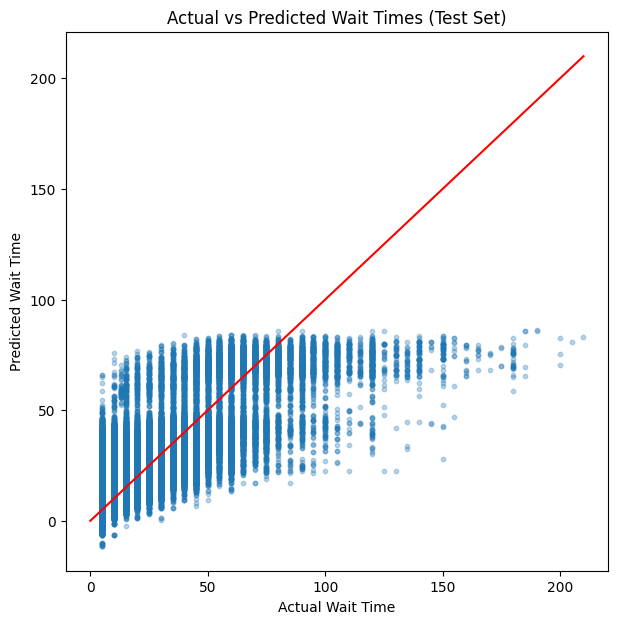

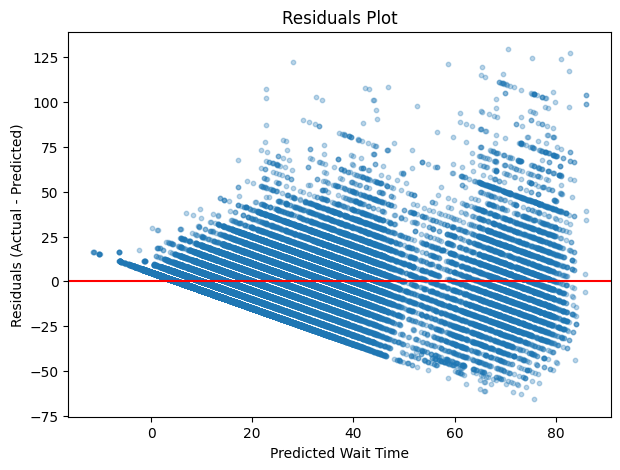

In [12]:
# STEP 7: Visual evaluation of linear regression performance
import matplotlib.pyplot as plt

# Scatter: Actual vs Predicted (Test Set)
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_test, alpha=0.3, s=10)
plt.xlabel("Actual Wait Time")
plt.ylabel("Predicted Wait Time")
plt.title("Actual vs Predicted Wait Times (Test Set)")
plt.plot([0, max(y_test)], [0, max(y_test)], color="red")
plt.show()

# Residuals plot
residuals = y_test - y_pred_test

plt.figure(figsize=(7,5))
plt.scatter(y_pred_test, residuals, alpha=0.3, s=10)
plt.axhline(0, color="red")
plt.xlabel("Predicted Wait Time")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.show()
